In [1]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [5]:
#Normalizing Age
df['age'] = (df['age'] / 365).astype(int)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


Bar Chart to see the count of people suffering from Cardiovascular Diseases

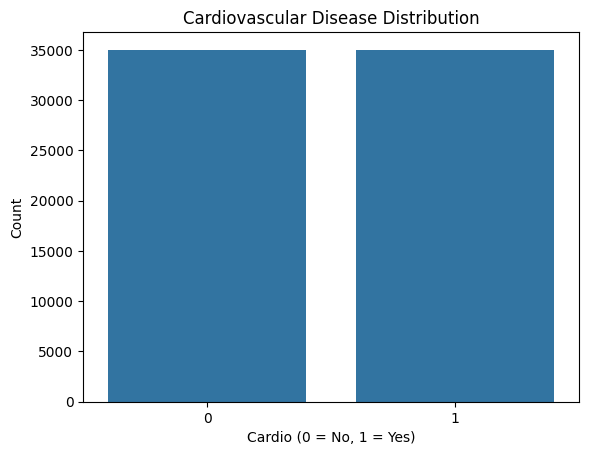

In [7]:
sns.countplot(data=df, x='cardio')
plt.title('Cardiovascular Disease Distribution')
plt.xlabel('Cardio (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Age Distribution by Cardio.It shows the patient of varied age group having cardiovascular Diseases and patient with Non Cardio-Diseases

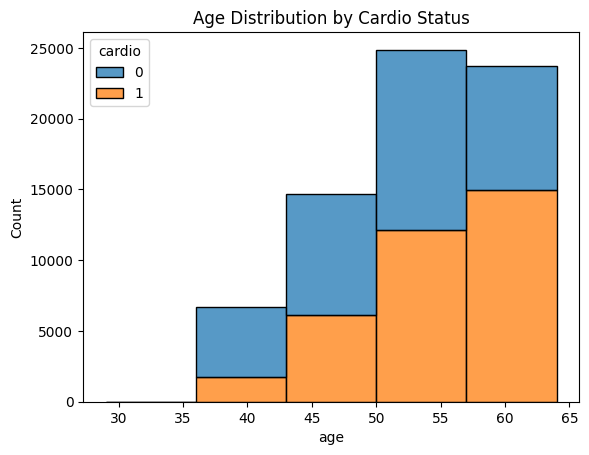

In [8]:
sns.histplot(data=df, x='age', hue='cardio', multiple='stack', bins=5)
plt.title('Age Distribution by Cardio Status')
plt.show()


Systolic Vs Diastolic BP Comparison for top 100 as it will overlap

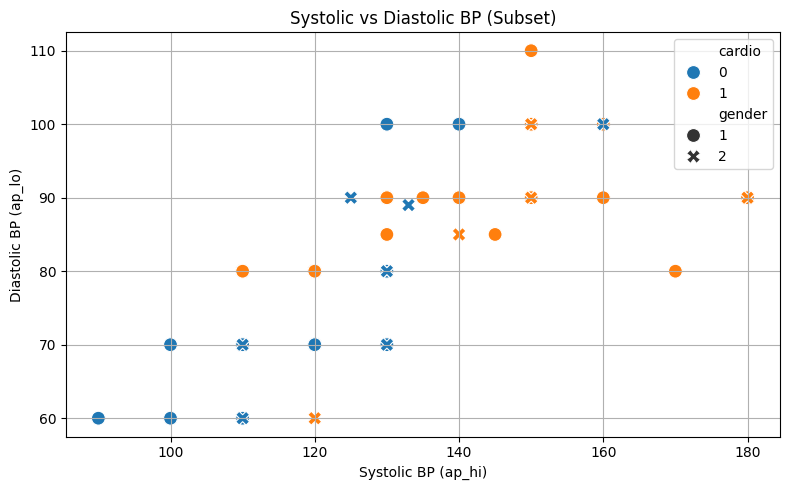

In [9]:
subset_df = df.head(100)

# Plot blood pressure comparison
plt.figure(figsize=(8, 5))
sns.scatterplot(data=subset_df, x='ap_hi', y='ap_lo', hue='cardio', style='gender', s=100)
plt.title('Systolic vs Diastolic BP (Subset)')
plt.xlabel('Systolic BP (ap_hi)')
plt.ylabel('Diastolic BP (ap_lo)')
plt.grid(True)
plt.tight_layout()
plt.show()

Systolic vs Diastolic BP for bottom 100

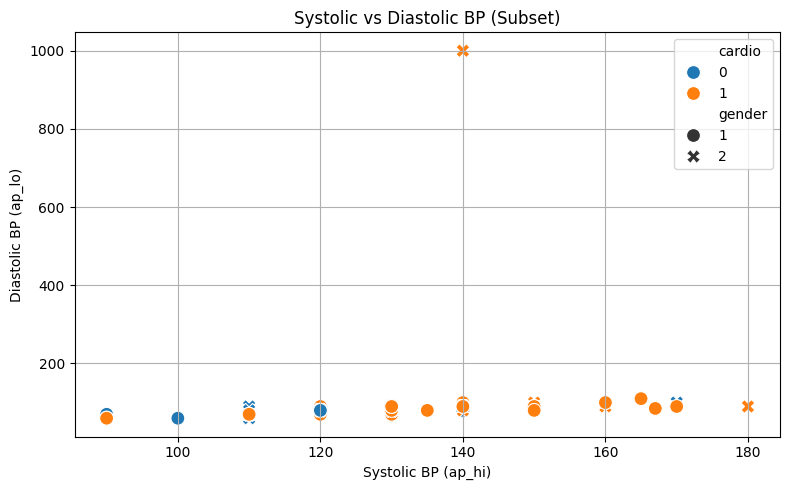

In [10]:
subset_f = df.tail(100)

# Plot blood pressure comparison
plt.figure(figsize=(8, 5))
sns.scatterplot(data=subset_f, x='ap_hi', y='ap_lo', hue='cardio', style='gender', s=100)
plt.title('Systolic vs Diastolic BP (Subset)')
plt.xlabel('Systolic BP (ap_hi)')
plt.ylabel('Diastolic BP (ap_lo)')
plt.grid(True)
plt.tight_layout()
plt.show()

HeatMap Correlation

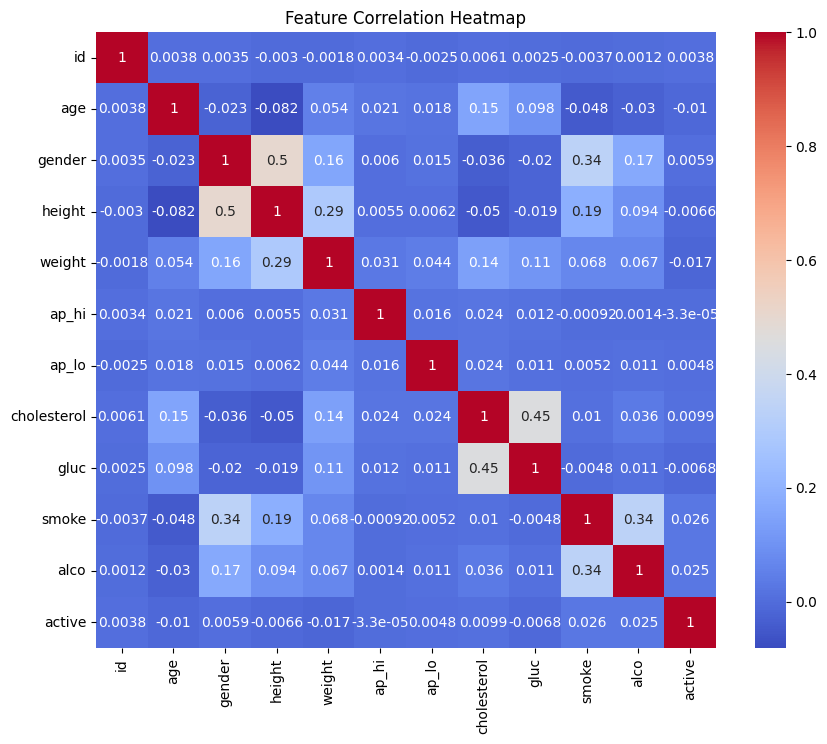

In [11]:
plt.figure(figsize=(10, 8))
corr = df.drop(columns='cardio').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Weight Distribution by Cardio

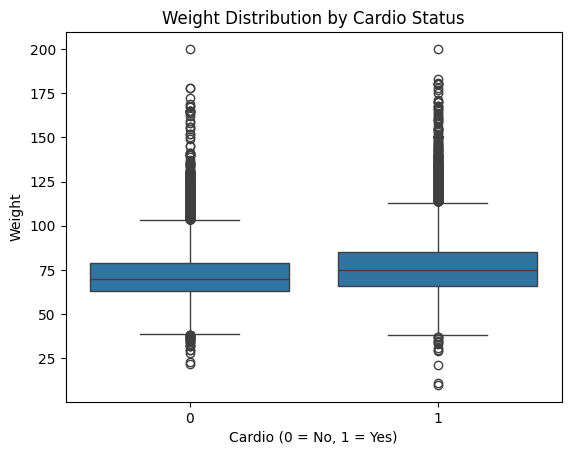

In [12]:
sns.boxplot(data=df, x='cardio', y='weight')
plt.title('Weight Distribution by Cardio Status')
plt.xlabel('Cardio (0 = No, 1 = Yes)')
plt.ylabel('Weight')
plt.show()


In [13]:
from scipy.stats import skew, kurtosis
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
df['height']=df['height'].apply(lambda x: x/100)

In [15]:
df.drop("id", axis = 1 , inplace = True )


In [18]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Data upsampling
cols_to_upsample = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

df_processed = df.copy()

for col in cols_to_upsample:
    print(f"SAMPLING : {col}")
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_data = df_processed.drop(columns=col)
    y_data = df_processed[col]

    X_res, y_res = smote.fit_resample(X_data, y_data)
    X_res[col] = y_res

    df_processed = X_res.copy()

SAMPLING : cholesterol
SAMPLING : gluc
SAMPLING : smoke
SAMPLING : alco
SAMPLING : active


In [20]:
print("New Dataset Shape : " , df_processed.shape )
df = df_processed.copy()

New Dataset Shape :  (1872656, 12)


In [21]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['map'] = df['ap_lo'] + (df['ap_hi'] - df['ap_lo'])/3
df['bmi']=df['weight']/(df['height'])**2
df['sys_dsys_ratio'] = df['ap_hi'] / df['ap_lo']

Attributes such as cholesterol and glucose levels possess ordinal characteristics, so we will convert them into categorical variables.

In [22]:
df['cholesterol']=df['cholesterol'].apply(lambda x: 'normal' if x==1 else('above_normal' if x==2 else 'well_above_normal'))
df['gluc']=df['gluc'].apply(lambda x: 'normal' if x==1 else('above_normal' if x==2 else 'well_above_normal'))

num_cols=df.select_dtypes(exclude='object').columns
cat_cols=df.select_dtypes(include='object').columns

The Box-Cox transformation is used to transform the 'age' data so that it is more normally distributed. This is often done because many statistical methods and machine learning models assume that the data is normally distributed. By applying the Box-Cox transformation, we can help to meet this assumption and potentially improve the performance of our models.

In [23]:
from scipy.stats import boxcox
age=np.array(df['age'])
_, opt_lambda=boxcox(age)
print(opt_lambda)

1.2442624776515534


In [26]:
df['age_box']=boxcox(df['age'], lmbda=opt_lambda)
features=df[['age_box','weight', 'cholesterol', 'gluc', 'smoke', 'alco','pulse_pressure', 'map', 'bmi']]
target=df['cardio']
num_features=features.select_dtypes(exclude='object').columns
cat_features=features.select_dtypes(include='object').columns
print(features)
print(target)
print(cat_features)
print(num_features)

            age_box     weight        cholesterol          gluc  smoke  alco  \
0        103.680992  62.000000             normal        normal      0     0   
1        116.836574  85.000000  well_above_normal        normal      0     0   
2        106.287439  64.000000  well_above_normal        normal      0     0   
3         98.506403  82.000000             normal        normal      0     0   
4         95.938658  56.000000             normal        normal      0     0   
...             ...        ...                ...           ...    ...   ...   
1872651  135.746945  95.205398             normal  above_normal      0     0   
1872652  122.182741  78.403099       above_normal  above_normal      0     0   
1872653  106.287439  84.172106             normal        normal      1     1   
1872654  116.836574  90.050453             normal        normal      1     1   
1872655  122.182741  92.095742       above_normal        normal      1     1   

         pulse_pressure         map    

In [27]:
features=pd.get_dummies(features, columns=['cholesterol', 'gluc'])
print(features)

            age_box     weight  smoke  alco  pulse_pressure         map  \
0        103.680992  62.000000      0     0              30   90.000000   
1        116.836574  85.000000      0     0              50  106.666667   
2        106.287439  64.000000      0     0              60   90.000000   
3         98.506403  82.000000      0     0              50  116.666667   
4         95.938658  56.000000      0     0              40   73.333333   
...             ...        ...    ...   ...             ...         ...   
1872651  135.746945  95.205398      0     0              59  129.666667   
1872652  122.182741  78.403099      0     0            -860  713.333333   
1872653  106.287439  84.172106      1     1              60  110.000000   
1872654  116.836574  90.050453      1     1              55   98.333333   
1872655  122.182741  92.095742      1     1              40  103.333333   

               bmi  cholesterol_above_normal  cholesterol_normal  \
0        21.967120             

In [28]:
scaler=StandardScaler()
features[num_features]=scaler.fit_transform(features[num_features])
print(features)

          age_box    weight     smoke      alco  pulse_pressure       map  \
0       -0.281061 -1.135112 -1.508463 -1.004903       -0.023810 -0.181988   
1        0.485372  0.273894 -1.508463 -1.004903        0.092703 -0.024509   
2       -0.129212 -1.012590 -1.508463 -1.004903        0.150959 -0.181988   
3       -0.582528  0.090110 -1.508463 -1.004903        0.092703  0.069978   
4       -0.732123 -1.502678 -1.508463 -1.004903        0.034447 -0.339467   
...           ...       ...       ...       ...             ...       ...   
1872651  1.587074  0.899088 -1.508463 -1.004903        0.145133  0.192812   
1872652  0.796835 -0.130240 -1.508463 -1.004903       -5.208604  5.707725   
1872653 -0.129212  0.223176  0.662926  0.995120        0.150959  0.006987   
1872654  0.485372  0.583290  0.662926  0.995120        0.121831 -0.103248   
1872655  0.796835  0.708587  0.662926  0.995120        0.034447 -0.056005   

              bmi  cholesterol_above_normal  cholesterol_normal  \
0       

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=.2)
# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(x_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9692709835207672


In [31]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    233874
           1       0.96      0.96      0.96    140658

    accuracy                           0.97    374532
   macro avg       0.97      0.97      0.97    374532
weighted avg       0.97      0.97      0.97    374532



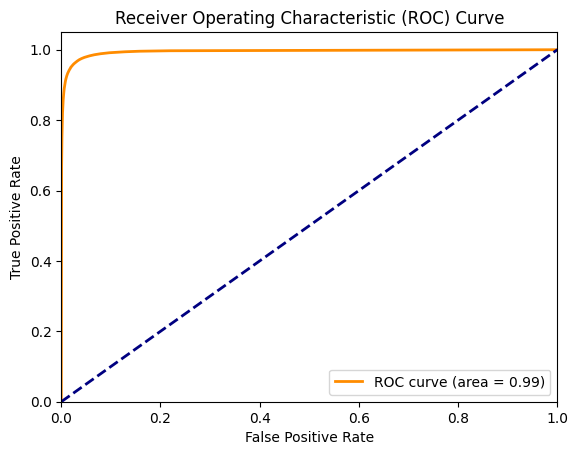

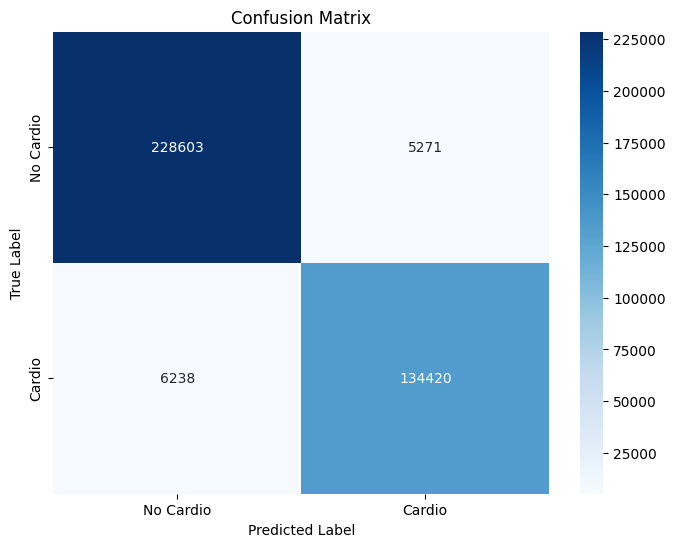

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cardio', 'Cardio'], yticklabels=['No Cardio', 'Cardio'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()